# Info
Name:  

    KORUS_AOD_comp

Purpose:  

    Comparison of AOD from 4STAR along flight track and GOCI aerosol
    Additional calculations of the aerosol extinction profile
  
Input:

    none at command line
  
Output:

    figures and save files...
  
Keywords:

    none
  
Dependencies:

    - load_utils.py : for loading OMI HDF5 files
    - matplotlib
    - numpy
    - scipy : for saving and reading
    - pytables
    - os
    - datetime
  
Needed Files:

  - file.rc : for consistent creation of look of matplotlib figures
  - ...
  
Modification History:

    Written: Samuel LeBlanc, OSAN AFB, Korea, 2016-05-06
    Modified: 

# Import the required modules and set up base

In [104]:
%config InlineBackend.rc = {}
import matplotlib 
matplotlib.rc_file('C:\\Users\\sleblan2\\Research\\python_codes\\file.rc')
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import scipy.io as sio
import Sp_parameters as Sp
import load_utils as lm
import os
from datetime import datetime

In [105]:
import hdf5storage as hs
import tables

In [106]:
from mpl_toolkits.basemap import Basemap,cm
%matplotlib notebook
fp = 'C:/Users/sleblan2/Research/KORUS-AQ/'

In [222]:
daystr = '20160504'

# Load the various data

## Load the 4STAR starsun

In [107]:
f_star = fp+'data\\{}starsun.mat'.format(daystr)

In [108]:
s = sio.loadmat(f_star)

In [35]:
s.keys()

['Str',
 'tau_O3_err',
 'sza',
 'm_ray',
 'toggle',
 'pitch',
 'Tst',
 'fwhm',
 'nirt',
 'tau_aero_noscreening',
 'rateaero',
 'O3h',
 'NO2col',
 'Headng',
 'RH',
 'Pst',
 'nirheader',
 'sd_aero_crit',
 'dark',
 'nirVdettemp',
 'Elstep',
 'tau_ray',
 'nircols',
 'sunaz',
 'O3col',
 'nirfilen',
 'f',
 'tau_O4_err',
 't',
 'c0mod',
 'tau_tot_slant',
 'rate',
 'program_version',
 'sat_time',
 'm_O3',
 'visheader',
 'nirTint',
 'filename',
 'tau_r_err',
 'nirsat_pixel',
 'Md',
 'aeronetcols',
 'rateslant',
 'visAVG',
 'tau_NO2_err',
 'Zn',
 'AZstep',
 'darkstd',
 'QdVtot',
 'nirAVG',
 'w',
 'ELcorr',
 'visVdettemp_C',
 'El_deg',
 'skyresp',
 'Lon',
 'tau_aero',
 'AZ_deg',
 'visrow_labels',
 'm_H2O',
 'c0err',
 'viscols',
 'tau_CO2_CH4_N2O_abserr',
 'aerosolcols',
 'tau_O3',
 'vissat_pixel',
 'tau_O4',
 'tau_NO2',
 'tau_aero_polynomial',
 'ratetot',
 'visfilen',
 'c0',
 'Tprecon_C',
 'raw',
 '__header__',
 'rawcorr',
 'sat_ij',
 'sunel',
 'visTint',
 'Tbox_C',
 'QdVtb',
 'QdVlr',
 'nirVdett

In [109]:
s['utc'] = lm.toutc(lm.mat2py_time(s['t']))

In [110]:
s['tau_aero'].shape

(22609L, 1556L)

### Load the starflag for this day

In [224]:
f_info = 'C:\Users\sleblan2\Research\\4STAR_codes\data_folder\\'

In [227]:
finf = f_info+'starinfo_{}.m'.format(daystr)

In [248]:
with open(finf, 'r') as inF:
    for line in inF:
        if 'flagfilename' in line:
            f_flag = line[line.find("'")+1:line.rfind("'")]
            break

In [249]:
f_flag

'20160504_starflag_man_created20160510_2053by_SL.mat'

In [251]:
sflag = sio.loadmat(f_info+f_flag)

In [270]:
flag = sflag['manual_flags']['screen'][0][0][:,0]

In [271]:
flag.shape

(22609L,)

### Apply the flags to 4star data

In [272]:
s['tau_aero'][flag==1,:]=np.nan

## Load the GOCI aerosol products

In [151]:
fp_goci = fp+'sat/GOCI//20160505/'

In [152]:
fpl = os.listdir(fp_goci)

In [281]:
gg = []
gg_head = []
for f in fpl:
    f_goci = fp_goci+f
    gt,gth = lm.load_hdf(f_goci,values=(('lon',0),('lat',1),('aod550',2),('fmf550',3),('ssa440',4),('type',5),('ang',6),('QA',7),
                                ('obs_time',8),('cf',9),('turbidI',10),('Land_sea_mask',11)),verbose=False)
    gt['year'] = int(f.split('_')[-1].split('.')[0][0:4])
    gt['month'] = int(f.split('_')[-1].split('.')[0][4:6])
    gt['day'] = int(f.split('_')[-1].split('.')[0][6:8])
    gt['hour'] = int(f.split('_')[-1].split('.')[0][8:10])
    gt['minute'] = int(f.split('_')[-1].split('.')[0][10:12])
    gt['seconds'] = int(f.split('_')[-1].split('.')[0][12:14])
    gt['julian'] = float(datetime(gt['year'],gt['month'],gt['day'],gt['hour'],gt['minute'],
                                  gt['seconds']).timetuple().tm_yday)+gt['hour']/24.0+gt['minute']/60.0/24.0+gt['seconds']/3600.0/24.0
    
    gt['aod550_QA'] = gt['aod550']
    gt['aod550_QA'][gt['QA']==3] = np.nan
    gg.append(gt)
    gg_head.append(gth)

*** FillValue not used to replace NANs, will have to do manually ***
*** FillValue not used to replace NANs, will have to do manually ***
*** FillValue not used to replace NANs, will have to do manually ***
*** FillValue not used to replace NANs, will have to do manually ***
*** FillValue not used to replace NANs, will have to do manually ***
*** FillValue not used to replace NANs, will have to do manually ***
*** FillValue not used to replace NANs, will have to do manually ***
*** FillValue not used to replace NANs, will have to do manually ***
*** FillValue not used to replace NANs, will have to do manually ***
*** FillValue not used to replace NANs, will have to do manually ***
*** FillValue not used to replace NANs, will have to do manually ***
*** FillValue not used to replace NANs, will have to do manually ***
*** FillValue not used to replace NANs, will have to do manually ***
*** FillValue not used to replace NANs, will have to do manually ***
*** FillValue not used to replace 

In [167]:
len(gg)

8

In [168]:
fpl

['GOCI_YAER_AOP_20160505001644.hdf',
 'GOCI_YAER_AOP_20160505011644.hdf',
 'GOCI_YAER_AOP_20160505021644.hdf',
 'GOCI_YAER_AOP_20160505031644.hdf',
 'GOCI_YAER_AOP_20160505041644.hdf',
 'GOCI_YAER_AOP_20160505051644.hdf',
 'GOCI_YAER_AOP_20160505061644.hdf',
 'GOCI_YAER_AOP_20160505071643.hdf']

In [175]:
gg[4]['julian']

126.17828703703704

## Get the AERONET data to overlay on plot

In [177]:
fp

'C:/Users/sleblan2/Research/KORUS-AQ/'

In [176]:
reload(lm)

<module 'load_utils' from 'load_utils.pyc'>

In [178]:
fa = fp+'aeronet/AOT/LEV10/ALL_POINTS/'

In [179]:
aero = lm.load_multi_aeronet(fa)

Opening file: C:/Users/sleblan2/Research/KORUS-AQ/aeronet/AOT/LEV10/ALL_POINTS/160401_160731_Anmyon.lev10
Opening file: C:/Users/sleblan2/Research/KORUS-AQ/aeronet/AOT/LEV10/ALL_POINTS/160401_160731_AOE_Baotou.lev10
Opening file: C:/Users/sleblan2/Research/KORUS-AQ/aeronet/AOT/LEV10/ALL_POINTS/160401_160731_Baengnyeong.lev10
Opening file: C:/Users/sleblan2/Research/KORUS-AQ/aeronet/AOT/LEV10/ALL_POINTS/160401_160731_Beijing-CAMS.lev10
Opening file: C:/Users/sleblan2/Research/KORUS-AQ/aeronet/AOT/LEV10/ALL_POINTS/160401_160731_Beijing.lev10
Opening file: C:/Users/sleblan2/Research/KORUS-AQ/aeronet/AOT/LEV10/ALL_POINTS/160401_160731_Beijing_RADI.lev10
Opening file: C:/Users/sleblan2/Research/KORUS-AQ/aeronet/AOT/LEV10/ALL_POINTS/160401_160731_Chiba_University.lev10
Opening file: C:/Users/sleblan2/Research/KORUS-AQ/aeronet/AOT/LEV10/ALL_POINTS/160401_160731_Fukuoka.lev10
Opening file: C:/Users/sleblan2/Research/KORUS-AQ/aeronet/AOT/LEV10/ALL_POINTS/160401_160731_Gangneung_WNU.lev10
Openin

In [180]:
ilatest = lm.aeronet_subset(aero)

<IPython.core.display.Javascript object>


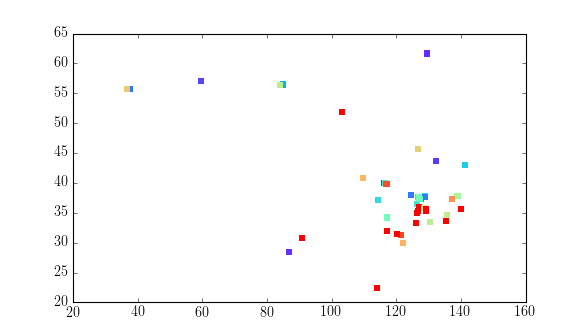

In [181]:
plt.figure()
plt.scatter(anet['long'],anet['lat'],c=anet['AOT_500'][il],
            cmap=plt.cm.rainbow,marker='s',vmin=0.0,vmax=1.5,edgecolors='None',s=30)


## Subset the aeronet and 4STAR values to GOCI values

In [198]:
utcs = []
iaero = []
istar = []
for i in range(len(gg)):
    utcs.append((gg[i]['julian']-np.floor(gg[i]['julian']))*24.0)
    iaero.append(lm.aeronet_subset(aero,julian=gg[i]['julian'],window=1.0))
    istar.append(((s['utc']-24.0)<utcs[i])&(s['Alt']<1000.0))

In [199]:
utcs

[0.27888888888878682,
 1.2788888888889005,
 2.2788888888886731,
 3.2788888888887868,
 4.2788888888889005,
 5.2788888888886731,
 6.2788888888887868,
 7.2786111111109904]

# Start making different plots/maps

In [197]:
#set up a easy plotting function
def make_map(ax=plt.gca()):
    m = Basemap(projection='stere',lon_0=128,lat_0=36.0,
            llcrnrlon=123.0, llcrnrlat=33.5,
            urcrnrlon=132.0, urcrnrlat=39,resolution='h',ax=ax)
    m.drawcoastlines()
    #m.fillcontinents(color='#AAAAAA')
    m.drawstates()
    m.drawcountries()
    m.drawmeridians(np.linspace(123,133,11),labels=[0,0,0,1])
    m.drawparallels(np.linspace(33,39,13),labels=[1,0,0,0])
    return m

## Start with simple map plot of GOCI

<IPython.core.display.Javascript object>


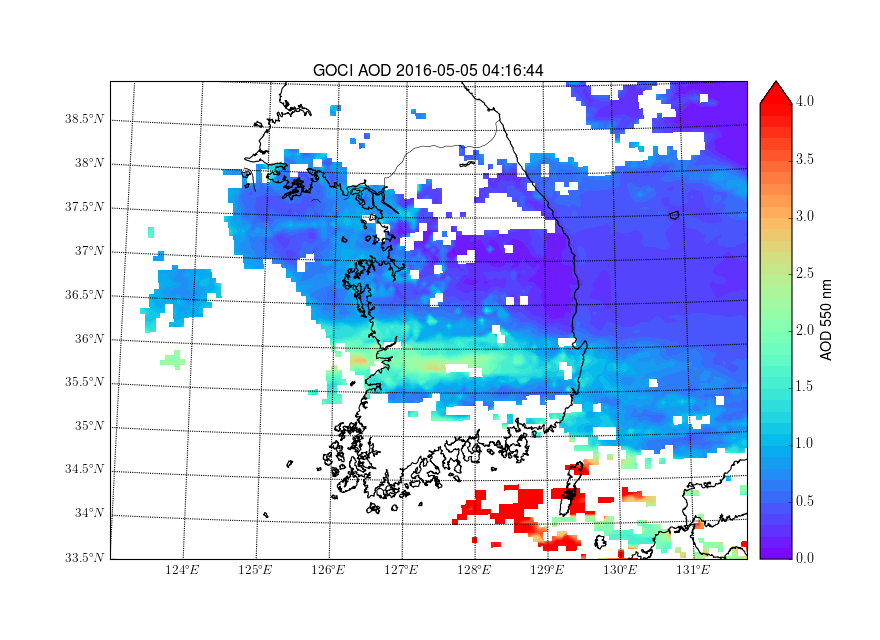

In [41]:
fig,ax = plt.subplots(1,1,figsize=(11,8))
m = make_map(ax)
x,y = m(gg['lon'],gg['lat'])
clevels = np.linspace(0,4,41)

plt.title('GOCI AOD 2016-05-05 04:16:44')
cs1 = m.contourf(x,y,gg['aod550'],clevels,cmap=plt.cm.rainbow,extend='max')
cbar = m.colorbar(cs1)
cbar.set_label('AOD 550 nm')

#xx,yy = m(star['lon'],star['lat'])
#m.scatter(xx,yy,c=star['tau'],cmap=plt.cm.rainbow,marker='o',vmin=clevels[0],vmax=clevels[-1],
#          alpha=0.5,edgecolors='k',linewidth=0.65)
plt.savefig(fp+'plot/20160505_GOCI_map_AOD.png',dpi=600,transparent=True)

<IPython.core.display.Javascript object>


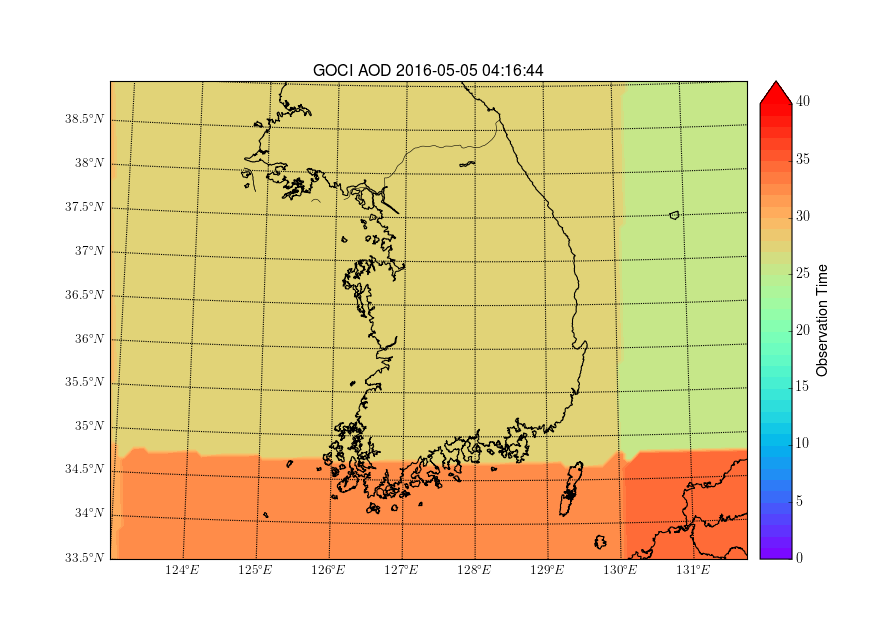

In [56]:
fig,ax = plt.subplots(1,1,figsize=(11,8))
m = make_map(ax)
x,y = m(gg['lon'],gg['lat'])
clevels = np.linspace(0,40,41)

plt.title('GOCI AOD 2016-05-05 04:16:44')
cs1 = m.contourf(x,y,gg['obs_time'],clevels,cmap=plt.cm.rainbow,extend='max')
cbar = m.colorbar(cs1)
cbar.set_label('Observation Time')


<IPython.core.display.Javascript object>


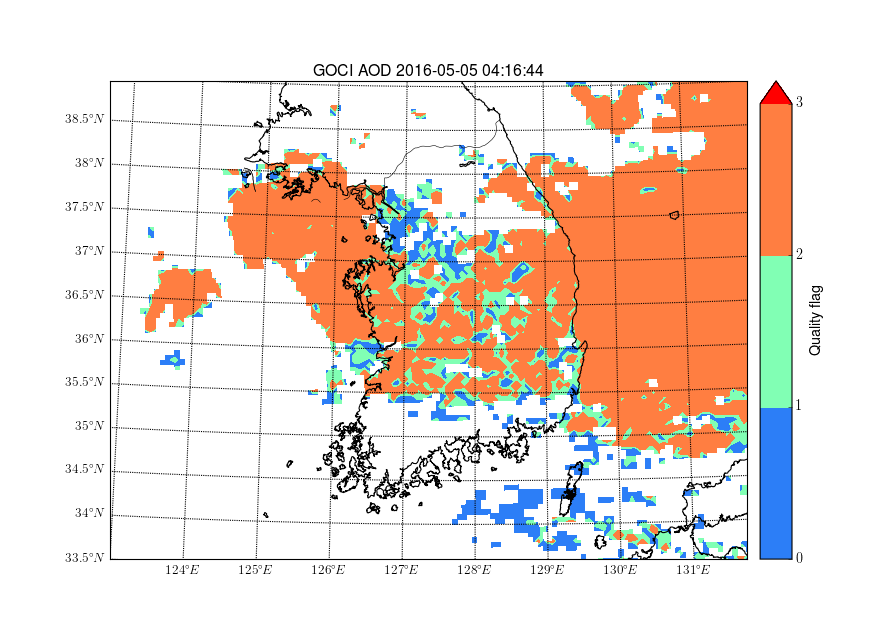

In [59]:
fig,ax = plt.subplots(1,1,figsize=(11,8))
m = make_map(ax)
x,y = m(gg['lon'],gg['lat'])
clevels = np.linspace(0,3,4)

plt.title('GOCI AOD 2016-05-05 04:16:44')
cs1 = m.contourf(x,y,gg['QA'],clevels,cmap=plt.cm.rainbow,extend='max')
cbar = m.colorbar(cs1)
cbar.set_label('Quality flag')

## Overlay 4STAR values

<IPython.core.display.Javascript object>


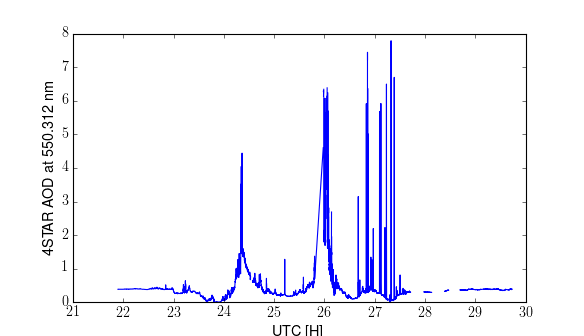

In [55]:
plt.figure()
plt.plot(s['utc'],s['tau_aero'][:,450])
plt.ylabel('4STAR AOD at {} nm'.format(s['w'][0][469]*1000.0))
plt.xlabel('UTC [H]')

In [61]:
ig = gg['QA']==3

In [62]:
ig.shape

(473L, 463L)

In [63]:
gg['aod550'].shape

(473L, 463L)

In [64]:
gg['aod550'][ig]=np.nan

<IPython.core.display.Javascript object>


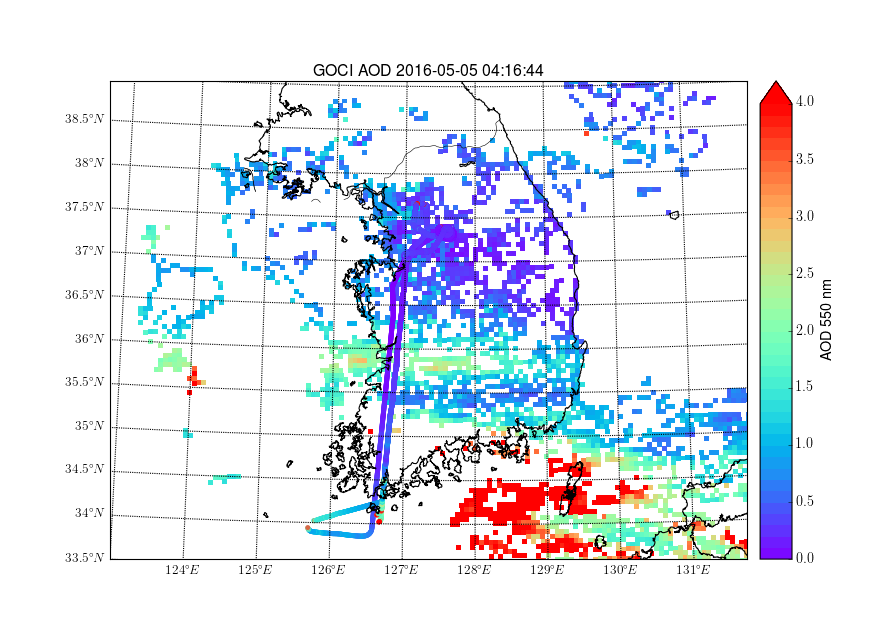

In [67]:
fig,ax = plt.subplots(1,1,figsize=(11,8))
m = make_map(ax)
x,y = m(gg['lon'],gg['lat'])
clevels = np.linspace(0,4,41)

plt.title('GOCI AOD 2016-05-05 04:16:44')
cs1 = m.contourf(x,y,gg['aod550'],clevels,cmap=plt.cm.rainbow,extend='max')
cbar = m.colorbar(cs1)
cbar.set_label('AOD 550 nm')
m.scatter(x,y,c=gg['aod550'],cmap=plt.cm.rainbow,marker='s',vmin=clevels[0],vmax=clevels[-1],edgecolors='None')


xx,yy = m(s['Lon'],s['Lat'])
m.scatter(xx,yy,c=s['tau_aero'][:,469],cmap=plt.cm.rainbow,marker='o',vmin=clevels[0],vmax=clevels[-1],
          alpha=0.5,edgecolors='None')
plt.savefig(fp+'plot/20160505_GOCI_4STAR_map_AOD.png',dpi=600,transparent=True)

## Overlay Aeronet AOD

In [69]:
fp

'C:/Users/sleblan2/Research/KORUS-AQ/'

<IPython.core.display.Javascript object>


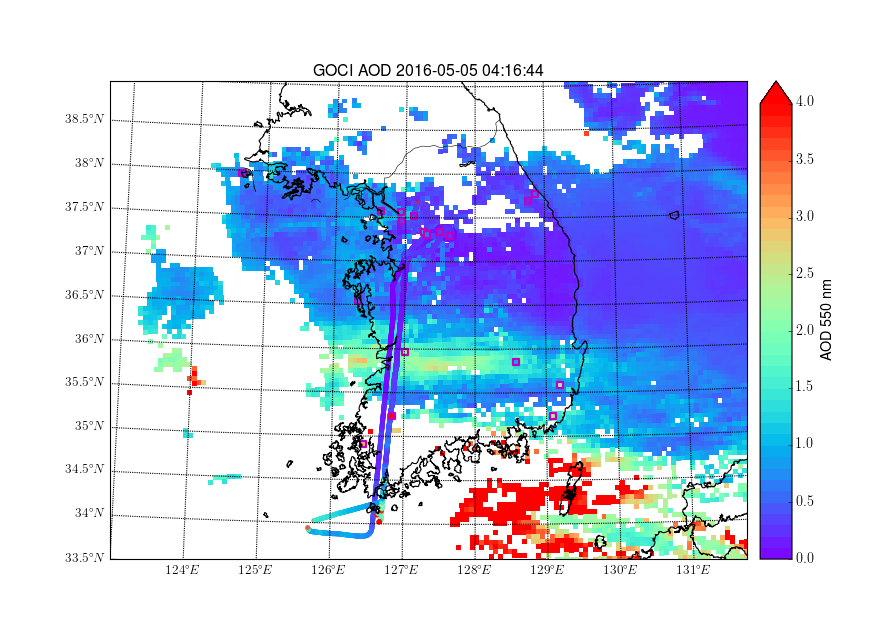

In [124]:
fig,ax = plt.subplots(1,1,figsize=(11,8))
m = make_map(ax)
x,y = m(gg['lon'],gg['lat'])
clevels = np.linspace(0,4,41)

plt.title('GOCI AOD 2016-05-05 04:16:44')
cs1 = m.contourf(x,y,gg['aod550'],clevels,cmap=plt.cm.rainbow,extend='max')
cbar = m.colorbar(cs1)
cbar.set_label('AOD 550 nm')
m.scatter(x,y,c=gg['aod550'],cmap=plt.cm.rainbow,marker='s',vmin=clevels[0],vmax=clevels[-1],edgecolors='None')


xx,yy = m(s['Lon'],s['Lat'])
m.scatter(xx,yy,c=s['tau_aero'][:,469],cmap=plt.cm.rainbow,marker='o',vmin=clevels[0],vmax=clevels[-1],
          alpha=0.5,edgecolors='None')

xa,ya = m(anet['long'],anet['lat'])
m.scatter(xa,ya,c=anet['AOT_500'][il],cmap=plt.cm.rainbow,marker='s',vmin=clevels[0],vmax=clevels[-1],
          alpha=1.0,edgecolors='m',s=40,linewidth=2)

#plt.savefig(fp+'plot/20160505_GOCI_4STAR_map_AOD.png',dpi=600,transparent=True)

## Make a GOCI figure with overlays for every time

<IPython.core.display.Javascript object>


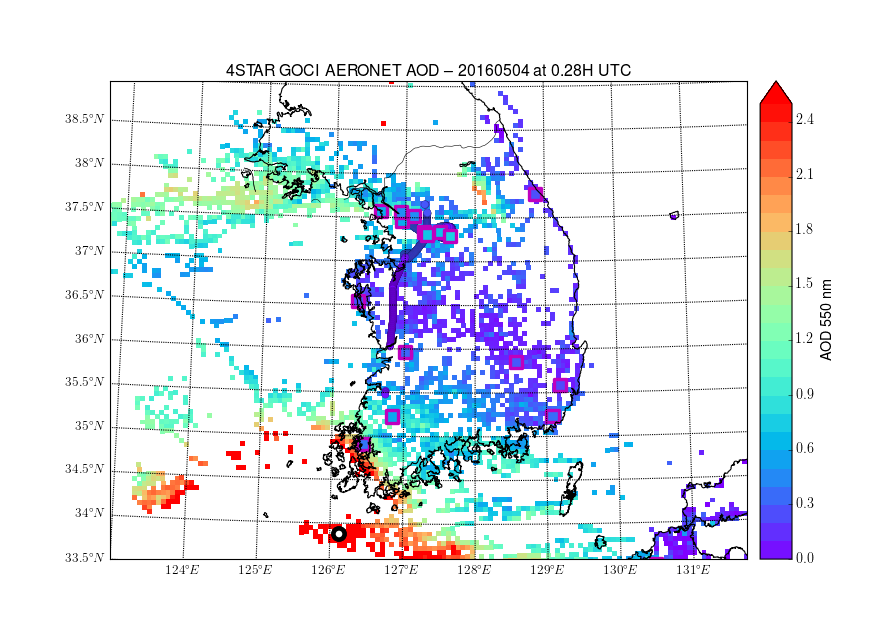

<IPython.core.display.Javascript object>


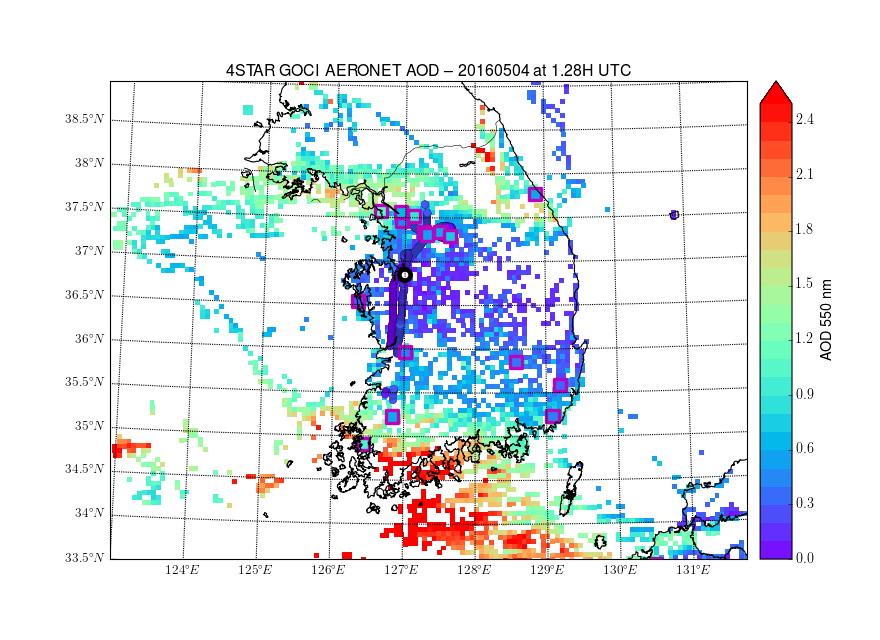

<IPython.core.display.Javascript object>


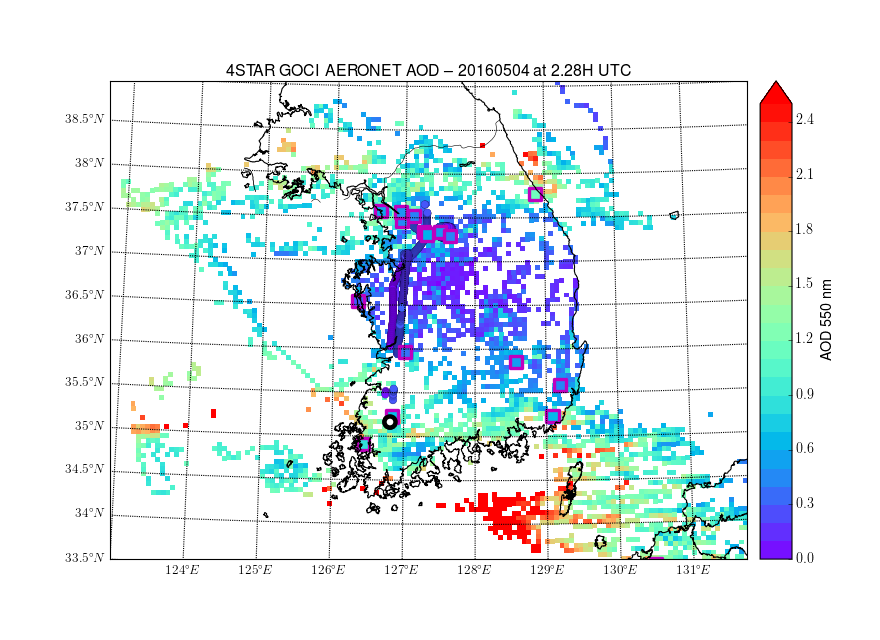

<IPython.core.display.Javascript object>


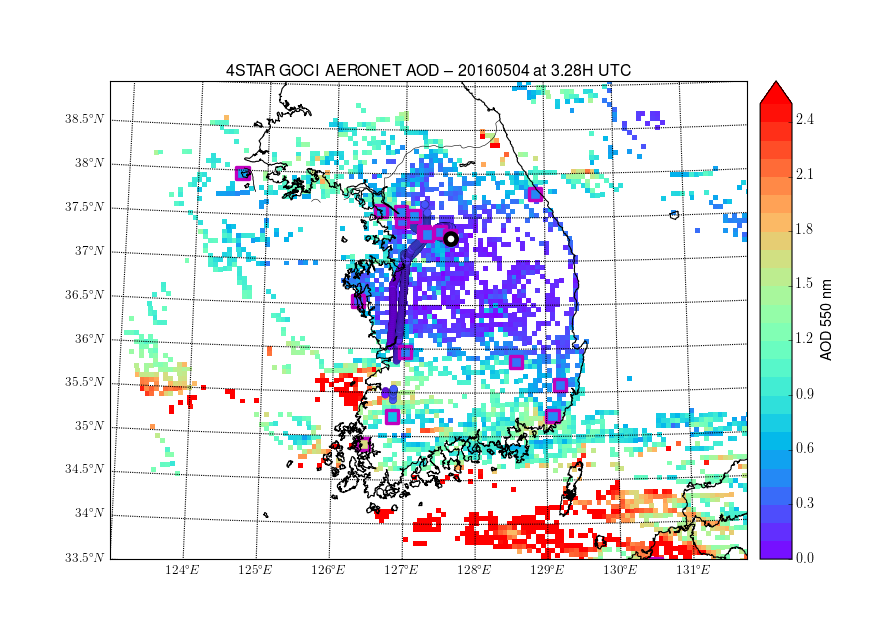

<IPython.core.display.Javascript object>


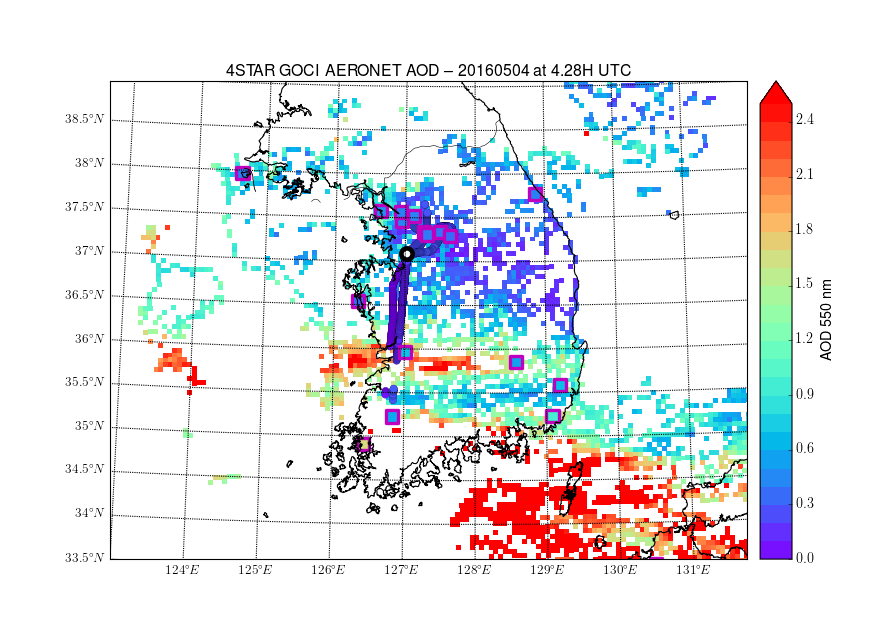

<IPython.core.display.Javascript object>


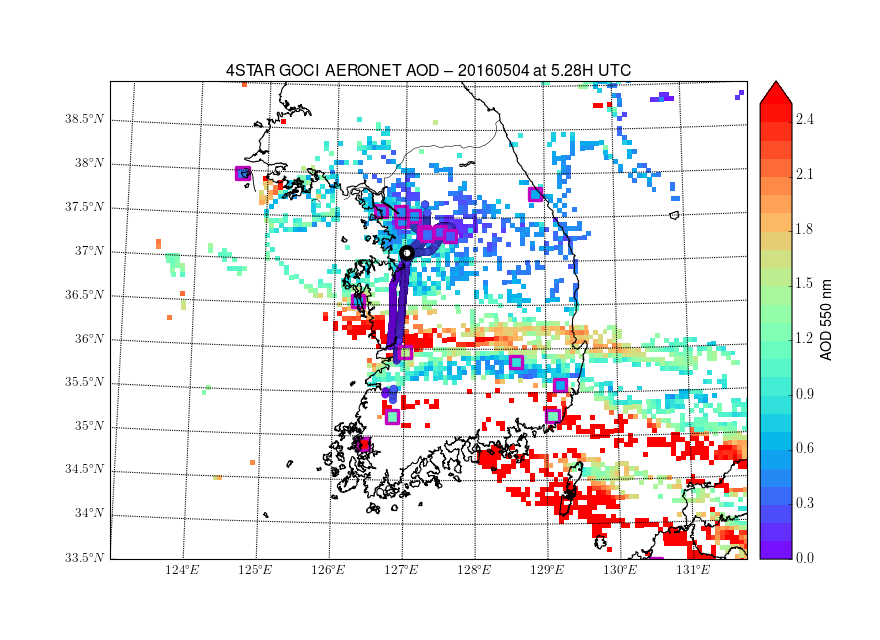

<IPython.core.display.Javascript object>


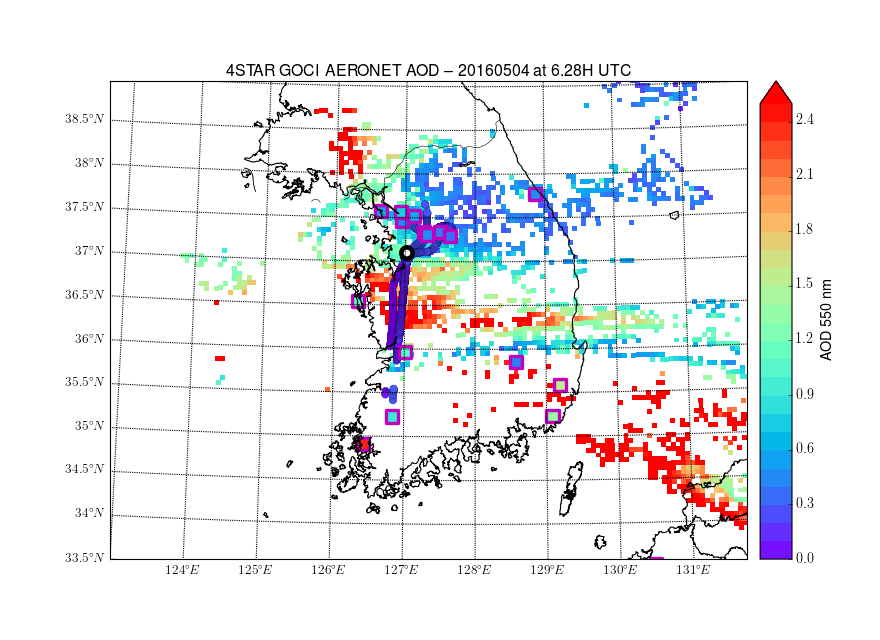

<IPython.core.display.Javascript object>


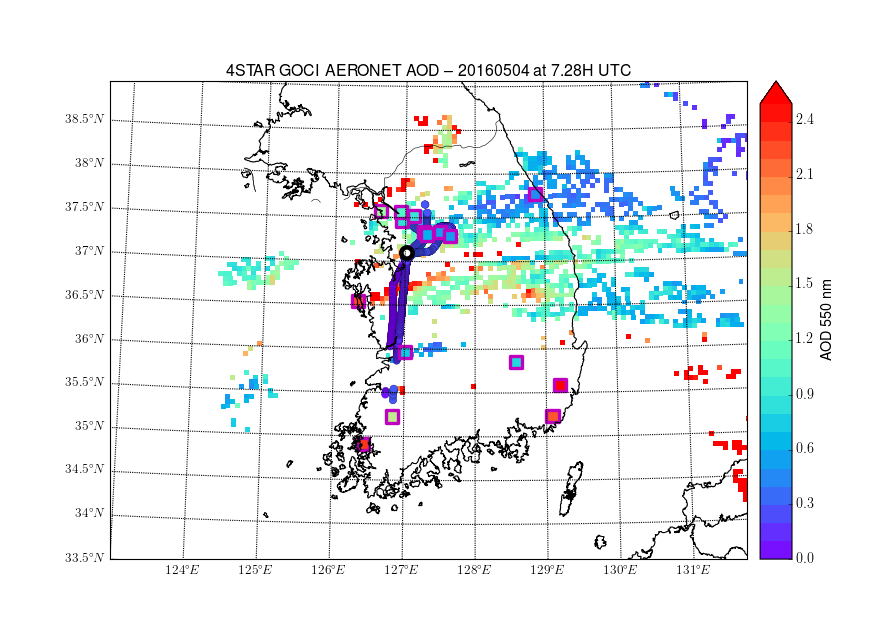

In [286]:
for i,u in enumerate(utcs):
    fig,ax = plt.subplots(1,1,figsize=(11,8))
    m = make_map(ax)
    x,y = m(gg[0]['lon'],gg[0]['lat'])
    clevels = np.linspace(0,2.5,26)

    plt.title('4STAR GOCI AERONET AOD -- {} at {:5.2f}H UTC'.format(daystr,u))
    cs1 = m.contourf(x,y,gg[i]['aod550_QA'],clevels,cmap=plt.cm.rainbow,extend='max')
    cbar = m.colorbar(cs1)
    cbar.set_label('AOD 550 nm')
    m.scatter(x,y,c=gg[i]['aod550_QA'],cmap=plt.cm.rainbow,marker='s',vmin=clevels[0],vmax=clevels[-1],edgecolors='None')
    
    xa,ya = m(aero['long'],anet['lat'])
    m.scatter(xa,ya,c=aero['AOT_500'][iaero[i]],cmap=plt.cm.rainbow,marker='s',vmin=clevels[0],vmax=clevels[-1],
              alpha=1.0,edgecolors='m',s=np.zeros_like(xa)+120,linewidth=3)
    
    xx,yy = m(s['Lon'][istar[i][0]],s['Lat'][istar[i][0]])
    m.scatter(xx,yy,c=s['tau_aero'][istar[i][0],469],cmap=plt.cm.rainbow,marker='o',vmin=clevels[0],vmax=clevels[-1],
              alpha=0.5,edgecolors='k',linewidth=0.1,s=s['tau_aero'][istar[i][0],469]*20+40)
    m.scatter(xx[-1],yy[-1],c='w',edgecolor='k',linewidth=4,marker='o',alpha=1.0,s=100)

    plt.savefig(fp+'plot/{}_GOCI_4STAR_map_AOD_{:5.2f}h.png'.format(daystr,u),dpi=600,transparent=True)

In [205]:
istar[0][0]

array([ True,  True,  True, ..., False, False, False], dtype=bool)

In [221]:
plt.figure()
plt.plot()

[0.27888888888878682,
 1.2788888888889005,
 2.2788888888886731,
 3.2788888888887868,
 4.2788888888889005,
 5.2788888888886731,
 6.2788888888887868,
 7.2786111111109904]